## 기본적인 EDA 접근 방식
- 데이터의 특징을 탐색하는 과정으로 시각화, 통계량, 더 나아가 모델링 기법을 통해 데이터에 내재된 패턴 파악

### 1. 기본적인 문제 정의 & 분석 목표 설정
- 이 데이터는 무엇을 보여주고 싶은가?
- 데이터에 담긴 값의 의미를 생각해보기
- 타겟 변수(궁금한 값)이 있는가?
- 어떤 관계를 탐색할 것인가? (타겟 변수에 영향을 주는 요인이 무엇인지?)
- 가설 설정 등

### 2. 데이터의 구조 파악하기
- 데이터의 행/열 개수
- 각 변수의 데이터 유형
- 기초적인 통계량(평균, 최대, 최소, 최빈, 빈도, 고유값, 중앙값 등)

### 3. 데이터의 품질 점검하기 (결측치/중복/이상치)
- 결측치 탐색하기(그에 따른 처리 전략 수립)
- 중복 데이터 탐색하기
  - pandas의 duplicated() 함수
- boxplot 또는 IQR(Inter-Quartile Range) 활용하여 이상치 탐색하기

### 4. 단변량 분석(단일 변수에 대한 탐색)
- 각 변수의 통계량, 분포를 통해 패턴 탐색
- 수치형 데이터: 히스토그램, 박스플롯 등
- 범주형 데이터: countplot, 파이 차트 등
> 이 변수는 어떻게 생겼는가? 어떠한 형태? 어떠한 패턴?

### 5. 이변량 분석(두 변수 간의 관계 탐색)
- 타겟 변수와 다른 변수와의 패턴/관계? (또는 서로 다른 변수 간의 관계)
- 수치형 x 수치형: 산점도, 상관관계 등
- 범주형 x 수치형: 박스플롯, 바이올린 플롯 등
- 범주형 x 범주형: 파이 차트, 막대 그래프, 히트맵 등
> 한 변수가 다른 변수에 영향을 주는가?

### 6. 다변량 분석(여러 개 변수 간의 관계 및 전체적인 패턴 파악)
- 복합적인 여러 개의 변수간의 패턴 파악
- 상관관계 히트맵
- seaborn의 pairplot() 함수

### 7. 핵심 인사이트 도출 및 결과 요약 정리
- 어떤 변수가 타깃에 가장 큰 영향을 주는가?
- 데이터의 분포적 특징은 무엇인가?
- 노이즈/편향/한계점 등은 무엇인가?
- 분석 목적에 맞는 설명 정리
- 핵심 그래프 선정
- 변수 간 주요 관계 요약
- 데이터의 특성·문제점·해석 가능한 인사이트 정리

*필요에 따라 파생 변수 생성 등 활용*

# Medical Insurance Charges (의료보험 비용)

Insurance Charges 데이터셋(Medical Cost Personal Dataset)은
개인의 나이, 성별, BMI, 흡연 여부, 가족 구성 등 기본 인구 통계 정보를 기반으로
의료 보험 비용(charges)이 어떻게 결정되는지를 분석하기 위해 수집된 자료

보험료 책정에 중요한 요인을 파악하는 연구나 헬스케어 분석 실습에서 널리 사용된다.

**건강·생활 요인이 보험 비용에 어떤 영향을 미치는지 분석.**

- `insurance.csv` 파일에 저장

| 컬럼명 | 설명 |
| --- | --- |
| `age` | 나이 (정책주체의 나이) |
| `sex` | 성별 (male / female) |
| `bmi` | 체질량지수 (Body Mass Index) |
| `children` | 자녀수 / 피보험자 부양가족 수 |
| `smoker` | 흡연 여부 (yes / no) |
| `region` | 거주 지역 (예: northeast, southeast, southwest, northwest) |
| `charges` | 보험 청구 비용 / 의료비용 (타겟 변수) |

## Guide
- 자유롭게 각 작업마다 코드 셀을 추가해서 EDA를 진행해보세요!
  - 코드 셀 추가하는 단축키 : esc + b
- 각 스텝마다에서 얻어진 객관적 사실
을 각각 정리해보세요!
- 분석 진행이나 컬럼/값의 의미/해석 등을 생성형 AI의 도움을 통해 아이디어를 받아보세요!
- 아래의 코드셀의 스텝 설명들은 일종의 가이드입니다.


In [57]:
# 1. 라이브러리 및 데이터셋 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 시각화 한글 깨짐 방지 설정
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('insurance.csv')
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


## 데이터의 기본 구조 파악하기
- 전체 shape 확인
- 컬럼별 타입 확인
- 기본 통계량(describe)으로 단위·범위 파악
- charges(보험료)의 평균·중앙값·분포
- region, sex, smoker, children 등의 빈도 파악

In [4]:
#데이터 전체 shape 확인 -> (1338, 7) ; 1338행, 7 컬럼
df.shape

(1338, 7)

In [5]:
#컬럼별 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [25]:
#기본 통계량으로 단위,범위 파악
# 평균 나이: 32세, 평균 bmi = 30.6, 보험료 최대값 : 63770원
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: xlabel='charges'>

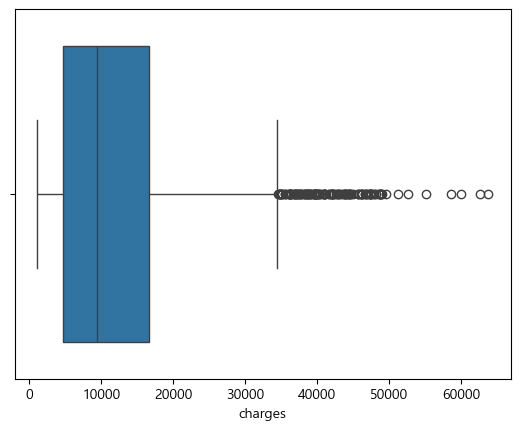

In [9]:
# charges(보험료)의 평균·중앙값·분포
sns.boxplot(data=df, x='charges')

<Axes: xlabel='region', ylabel='count'>

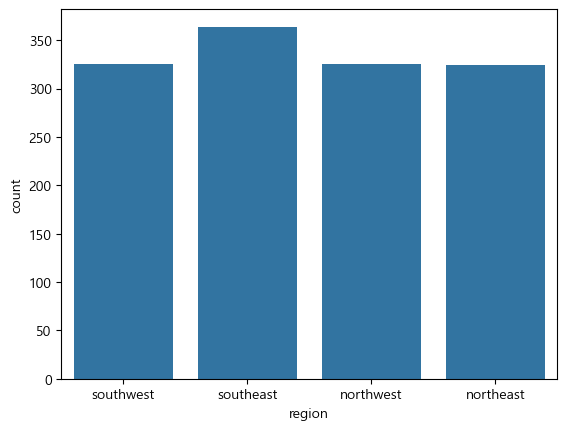

In [26]:
# region, sex, smoker, children 등의 빈도 파악
# region(거주 지역)에 대한 분포 -> 해당 거주지역에 몇명 정도 사는지
# southeast에 사ㅏ는 사람이 제일 많음
sns.countplot(data=df, x='region')

<Axes: xlabel='sex', ylabel='count'>

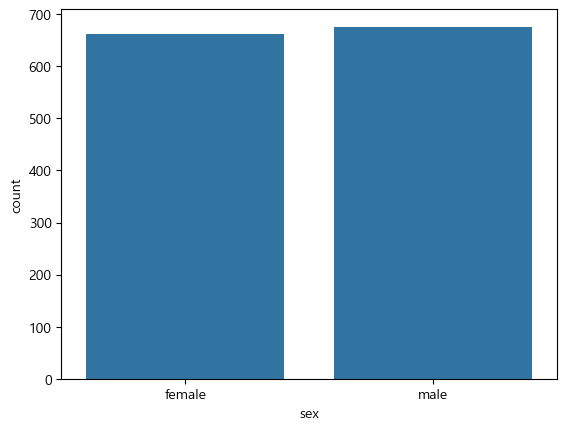

In [13]:
# sex 빈도 확인 -> 남/여 성비 확인
sns.countplot(data=df, x='sex')

<Axes: xlabel='smoker', ylabel='count'>

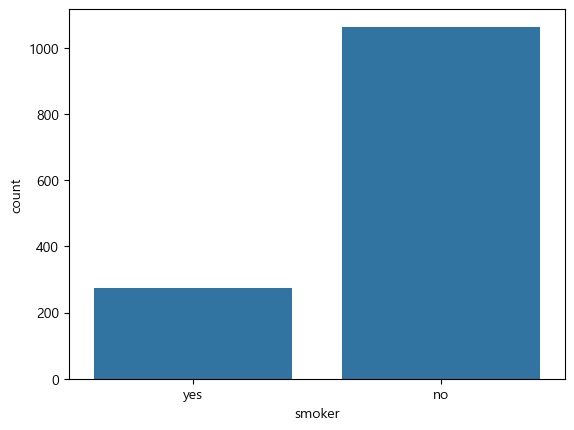

In [27]:
#smoker 빈도 확인 -> 흡연 여부 확인 
# 비흡연자의 비율이 더 높음
sns.countplot(data=df, x='smoker')

<Axes: xlabel='children', ylabel='count'>

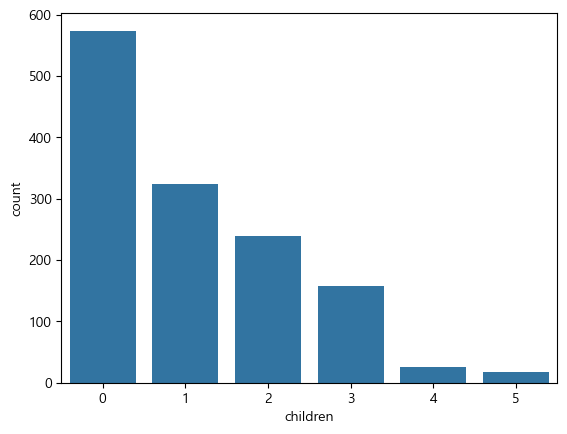

In [28]:
# children 빈도 확인 -> 자녀수/피보험자 부양가족 수 확인
# 자녀 및 부양가족이 없는 사람이 많음
sns.countplot(data=df, x='children')

## 데이터의 품질 확인하기
- 결측치 탐색(확인, 비율)
- boxplot으로 각 feature의 이상치 탐색
- IQR로 정량적 이상치 판단 (개수, 비율 등)

In [16]:
#결측치 탐색(확인, 비율)
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1ec45278a30>,
 'caps': [<matplotlib.lines.Line2D at 0x1ec45279030>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ec45278730>],
 'medians': [<matplotlib.lines.Line2D at 0x1ec45279630>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ec45279930>],
 'means': []}

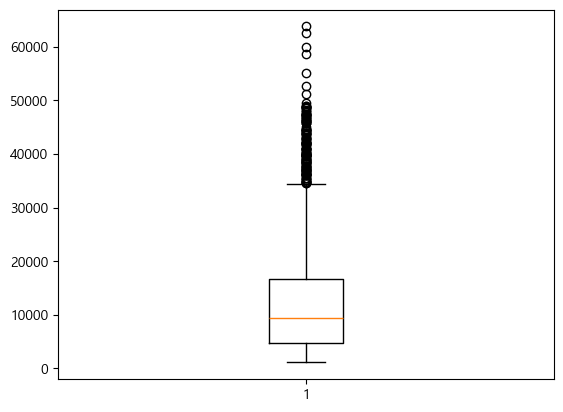

In [24]:
plt.boxplot(df['charges'])

## 단변량 분석

- 각 변수 별 분포 파악
- charges의 분포(히스토그램/KDE)
- BMI 분포 → 이상치 확인
- 나이에 따른 보험료 증가 추세 등

<Axes: xlabel='age', ylabel='Count'>

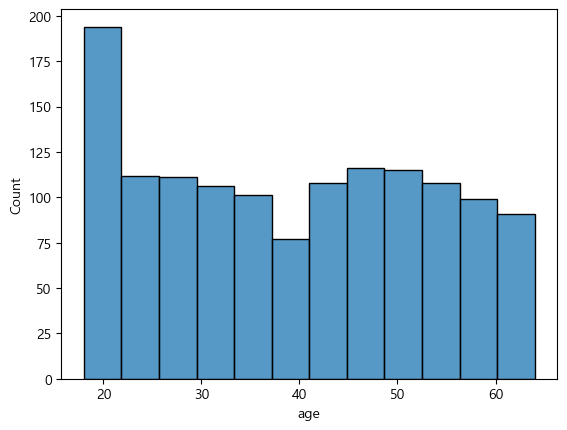

In [33]:
# 나이 분포도 확인
# 10대 후반 ~ 20대 초반이 제일 많음
sns.histplot(data=df, x='age')

<Axes: xlabel='bmi'>

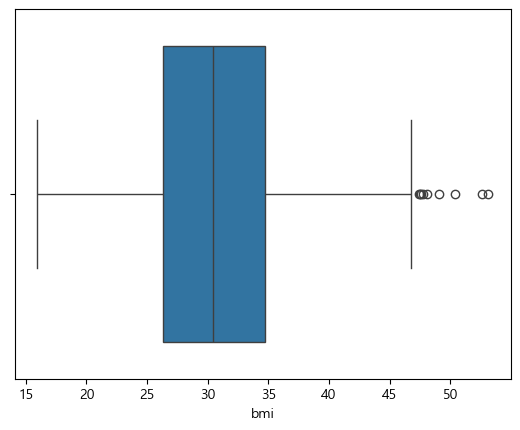

In [40]:
# bmi(체질량지수) 분포도 확인 + 이상치 확인
sns.boxplot(data=df, x='bmi')

<Axes: xlabel='charges', ylabel='Count'>

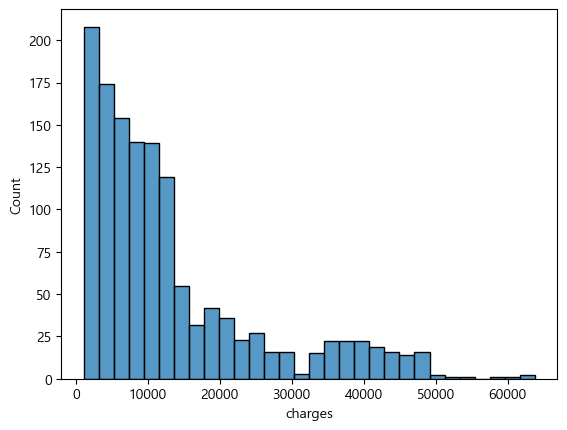

In [35]:
# charges(보험 청구 비용/의료비용(타겟변수))
sns.histplot(data=df, x='charges')

<Axes: xlabel='age', ylabel='charges'>

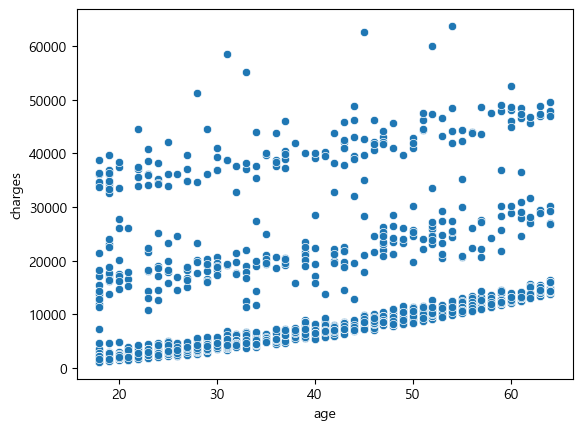

In [39]:
# 나이에 따른 보험료 증가 확인
sns.scatterplot(data=df, x='age',y='charges')

## 이변량, 다변량 분석
- smoker vs non-smoker의 보험료 비교
- 성별마다 보험료 차이?
- region에 따른 차이 존재 여부
- children 수에 따른 비용 증가 패턴
- 관계 분석
  - scatterplot(age vs charges)
  - scatterplot(bmi vs charges)
  - boxplot(bmi group vs charges)
  - correlation heatmap (수치형만)

In [41]:
print(df['smoker'])

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object


<Axes: xlabel='smoker', ylabel='charges'>

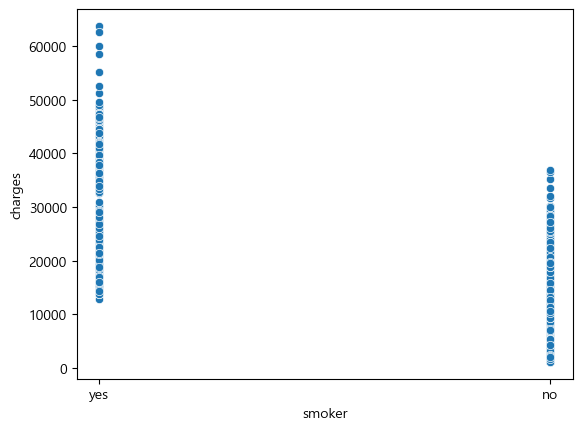

In [42]:
sns.scatterplot(data=df, x='smoker', y='charges')

In [46]:
# 흡연여부에 따른 평균 보험료 데이터 프레임
df_smoke_yn = df.groupby("smoker")["charges"].mean().reset_index()
print(df_smoke_yn)

  smoker       charges
0     no   8434.268298
1    yes  32050.231832


<Axes: xlabel='smoker', ylabel='charges'>

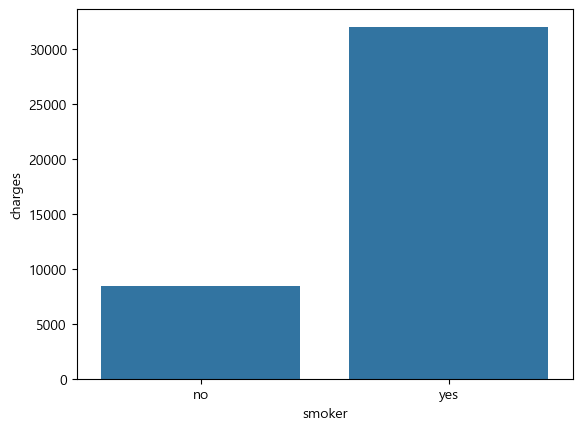

In [48]:
# 흡연 여부별 평균 보험료 비교(막대그래프)
# 결과: 흡연하는 사람의 평균 보혐료가 훨씬 높다
sns.barplot(data=df_smoke_yn, x='smoker',y='charges')

<Axes: xlabel='sex', ylabel='charges'>

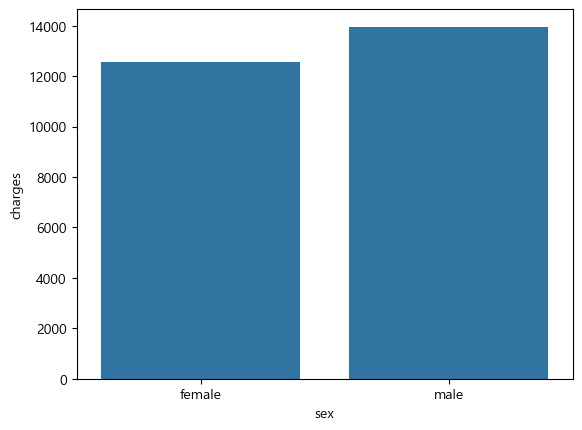

In [50]:
# 성별에 따른 보험료 차이
sns.barplot(data=df, x='sex', y='charges', errorbar=None)

<Axes: xlabel='children', ylabel='charges'>

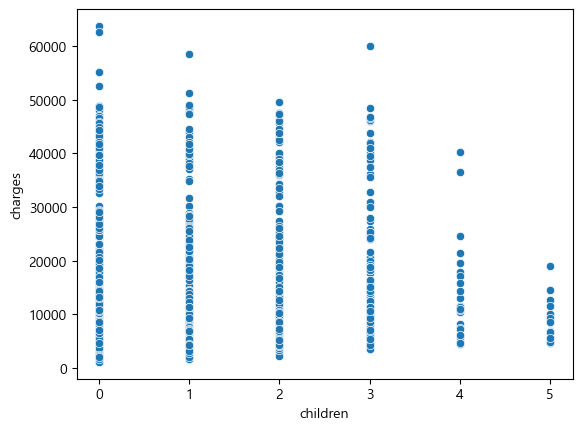

In [51]:
# children(자녀수, 부양가족)에 따른 보험료 증가 패턴 확인 : 산점도
sns.scatterplot(data=df, x='children',y='charges')

## 핵심 인사이트 정리
- smoker와 non-smoker 사이 보험료 차이
- 나이가 증가할수록 보험료가 어떻게 상승하는지
- BMI와 보험료의 비선형적 관계
- region 및 성별 등 다른 요인의 영향력

# 옆자리친구랑

   children  count
0         0    574
1         1    324
2         2    240
3         3    157
4         4     25
5         5     18


<Axes: xlabel='children', ylabel='count'>

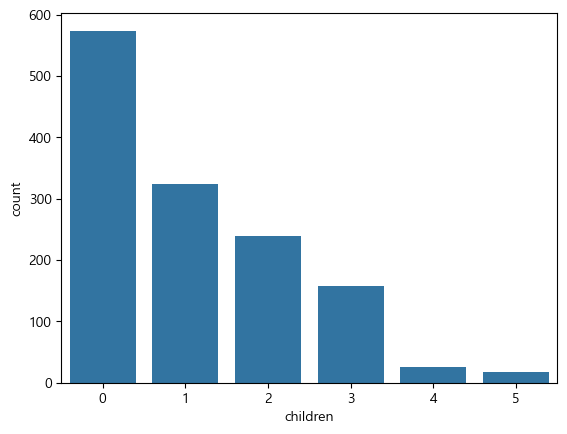

In [64]:
df1 = df['children'].value_counts().reset_index()
print(df1)

sns.barplot(data=df1, x='children', y='count')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [67]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


    age  count
0    18     69
1    19     68
2    46     29
3    52     29
4    50     29
5    47     29
6    48     29
7    51     29
8    45     29
9    20     29
10   24     28
11   27     28
12   28     28
13   25     28
14   23     28
15   49     28
16   54     28
17   53     28
18   22     28
19   21     28
20   26     28
21   31     27
22   41     27
23   44     27
24   43     27
25   42     27
26   29     27
27   30     27
28   40     27
29   32     26
30   33     26
31   57     26
32   34     26
33   55     26
34   56     26
35   35     25
36   58     25
37   37     25
38   59     25
39   39     25
40   36     25
41   38     25
42   62     23
43   60     23
44   63     23
45   61     23
46   64     22


<Axes: xlabel='age', ylabel='count'>

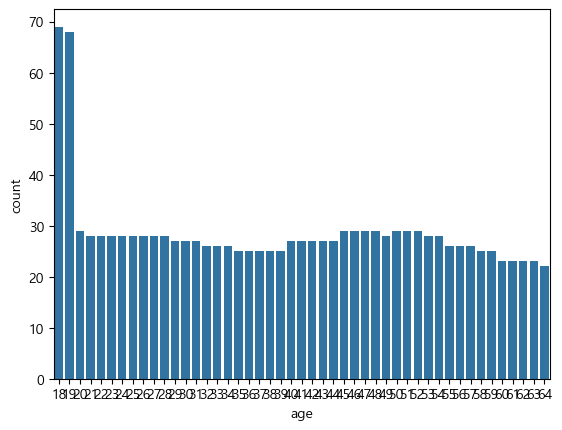

In [70]:
df2 = df['age'].value_counts().reset_index()
print(df2)

sns.barplot(data=df2, x='age', y='count')


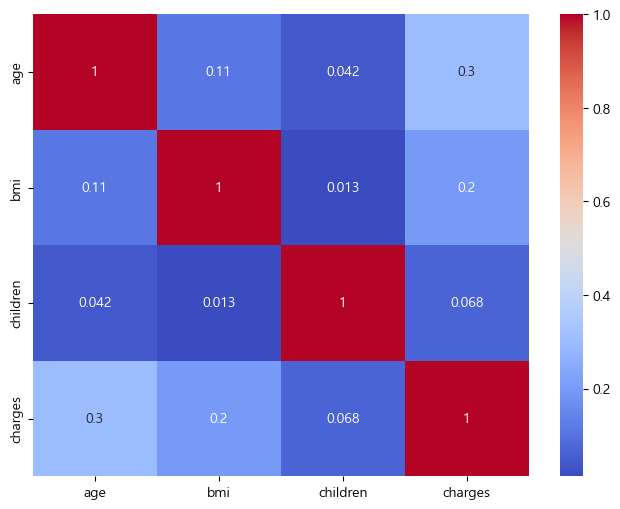

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# 숫자형 컬럼만 선택
num_df = df.select_dtypes(include=['int64', 'float64'])

# 상관관계 히트맵
plt.figure(figsize=(8,6))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.show()
